# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [4]:
# Checking the number of mice.
number_of_mice = len(combined_data["Mouse ID"].unique())

number_of_mice

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = duplicate_rows["Mouse ID"].unique()
duplicate_mouse_ids_array = np.array(duplicate_mouse_ids)

duplicate_mouse_ids_array

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ids)]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mice_ids = clean_data = combined_data.drop_duplicates(subset=['Mouse ID'], keep='first')
duplicate_mice_ids.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.

combined_duplicate = duplicate_mice_ids["Mouse ID"].unique().shape[0]
combined_duplicate

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_statistics = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics = summary_statistics.rename(columns={'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume', 'var': 'Tumor Volume Variance', 'std': 'Tumor Volume Std. Dev.', 'sem': 'Tumor Volume Std. Err.'})


summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_single_line = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Deviation', 'sem': 'SEM'})

summary_statistics_single_line


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

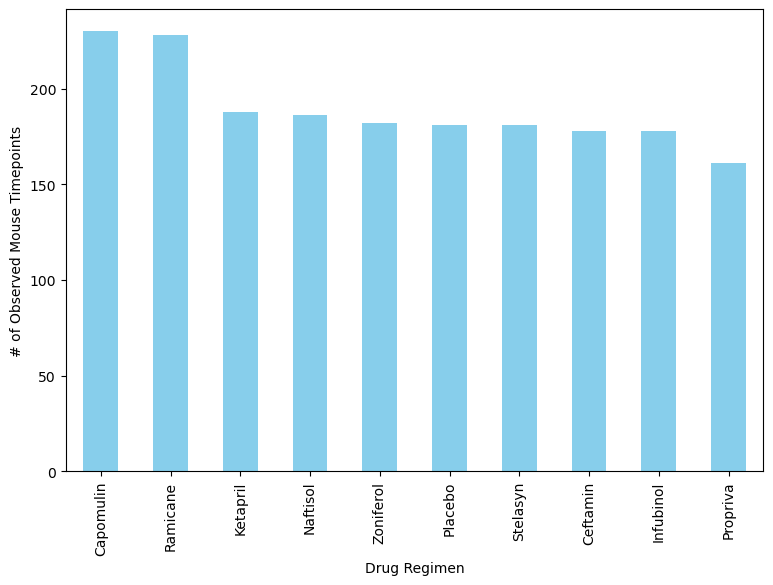

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


drug_counts = combined_data.groupby('Drug Regimen').size()
drug_counts_sorted = drug_counts.sort_values(ascending=False)
drug_counts_sorted.plot(kind='bar', figsize=(9, 6), color='skyblue')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()

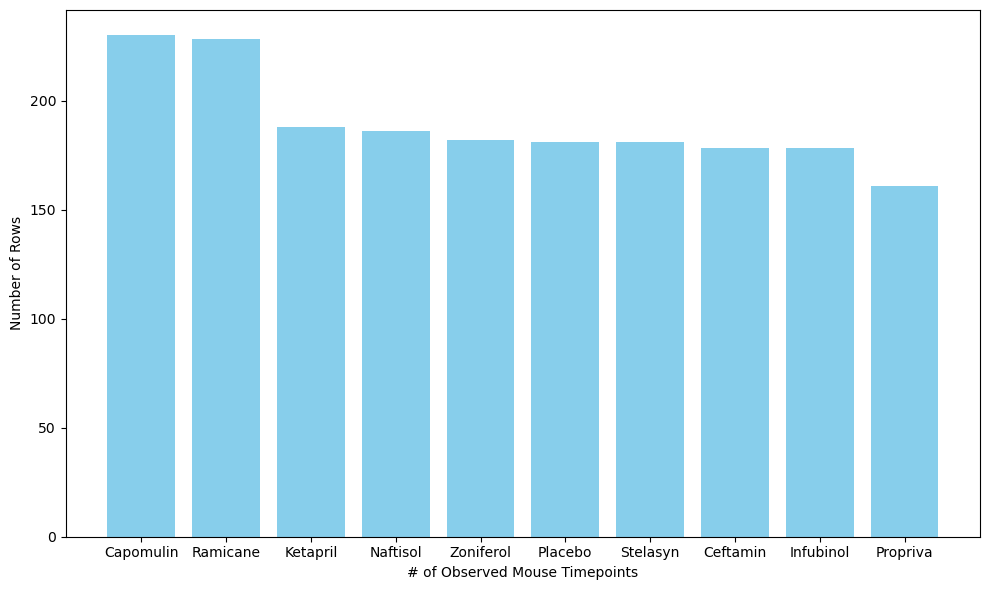

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_counts = combined_data.groupby('Drug Regimen').size()
drug_counts_sorted = drug_counts.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(drug_counts_sorted.index, drug_counts_sorted, color='skyblue')

ax.set_xlabel('# of Observed Mouse Timepoints')
ax.set_ylabel('Number of Rows')

plt.tight_layout()
plt.show()

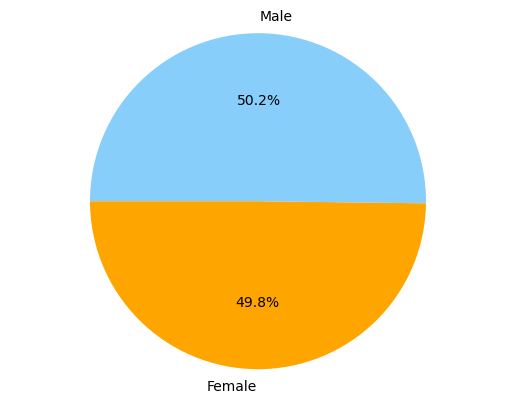

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_distribution = mouse_metadata.groupby('Sex').size()
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', startangle=180, colors=['orange', 'lightskyblue'])
plt.axis('equal')

plt.show()


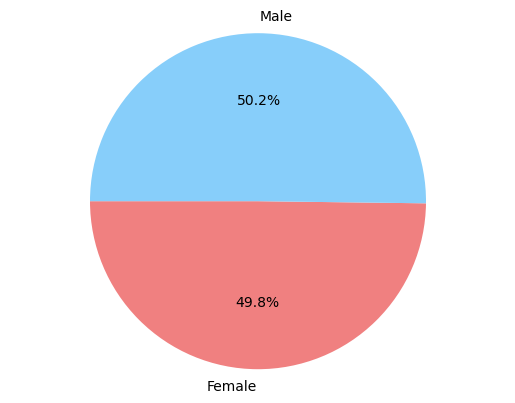

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_distribution = mouse_metadata.groupby('Sex').size()
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', startangle=180, colors=['lightcoral', 'lightskyblue'])

plt.axis('equal')


plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
    # Calculate the final tumor volume of each mouse across four of the treatment regimens:  
    # Capomulin, Ramicane, Infubinol, and Ceftamin

    # Start by getting the last (greatest) timepoint for each mouse


    # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
max_timepoints = combined_data.groupby('Mouse ID')['Timepoint'].max()
max_timepoints_df = max_timepoints.reset_index()
final_tumor_volume = pd.merge(max_timepoints_df, combined_data, on=['Mouse ID', 'Timepoint'], how='inner')
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(treatment_regimens)]

final_tumor_volume



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
239,y769,45,68.594745,4,Ceftamin,Female,6,27
240,y793,45,31.896238,2,Capomulin,Male,17,17
241,y865,45,64.729837,3,Ceftamin,Male,23,26
245,z578,45,30.638696,0,Ramicane,Male,11,16


In [16]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
for treatment in treatments:
    
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    

    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    

    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    

    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


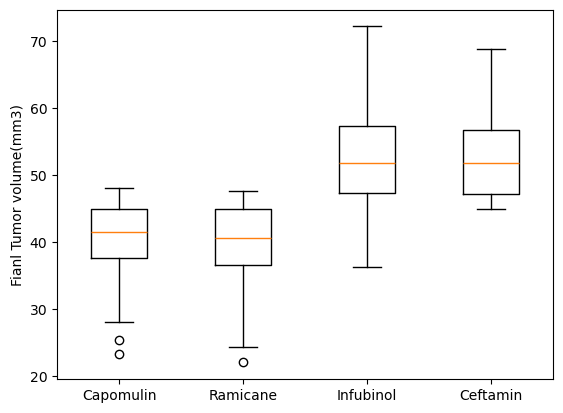

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_data = []

for treatment in treatments:
   
    treatment_data = combined_data[combined_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    tumor_volume_data.append(treatment_data)


plt.boxplot(tumor_volume_data, labels=treatments)
plt.ylabel('Fianl Tumor volume(mm3)')


plt.grid(False)
plt.show()

## Line and Scatter Plots

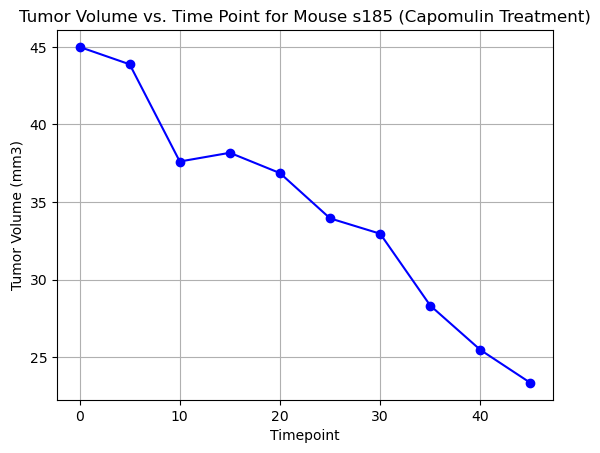

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Define the mouse ID
mouse_id = 's185'

# Filter the data for the specified mouse treated with Capomulin
mouse_data = combined_data[(combined_data['Mouse ID'] == mouse_id) & (combined_data['Drug Regimen'] == 'Capomulin')]

# Plot tumor volume vs. time point
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='blue')

# Add labels and title
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)")

# Show plot
plt.grid(True)
plt.show()



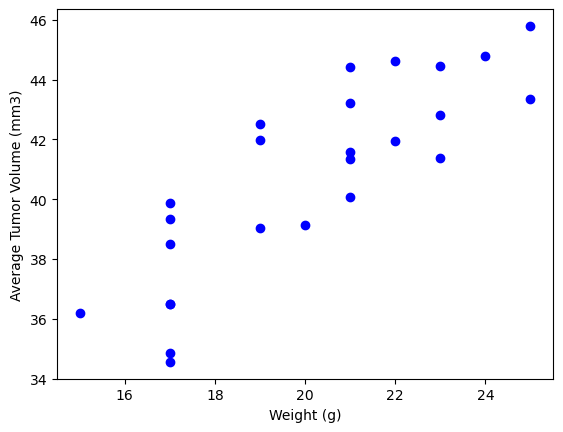

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regimen
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume data with the mouse metadata to get the weight of each mouse
mouse_weight_vs_tumor_volume = pd.merge(average_tumor_volume, mouse_metadata, on='Mouse ID', how='left')

# Create a scatter plot of mouse weight vs. average tumor volume
plt.scatter(mouse_weight_vs_tumor_volume['Weight (g)'], mouse_weight_vs_tumor_volume['Tumor Volume (mm3)'], color='blue')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show plot
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


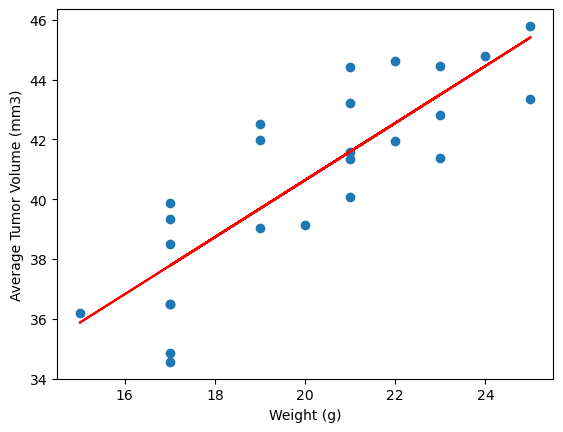

In [26]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight_vs_tumor_volume = pd.merge(average_tumor_volume, mouse_metadata, on='Mouse ID', how='left')

correlation = st.pearsonr(mouse_weight_vs_tumor_volume['Weight (g)'], mouse_weight_vs_tumor_volume['Tumor Volume (mm3)'])[0]
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation:.2f}")

slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight_vs_tumor_volume['Weight (g)'], mouse_weight_vs_tumor_volume['Tumor Volume (mm3)'])

predicted_tumor_volume = slope * mouse_weight_vs_tumor_volume['Weight (g)'] + intercept

plt.scatter(mouse_weight_vs_tumor_volume['Weight (g)'], mouse_weight_vs_tumor_volume['Tumor Volume (mm3)'], label='Observed Data')
plt.plot(mouse_weight_vs_tumor_volume['Weight (g)'], predicted_tumor_volume, color='red', label='Fitted Line')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()